In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import librosa
import numpy as np

In [2]:
class WavGAN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(WavGAN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)

        self.fc = nn.Linear(128 * (input_dim // 4), output_dim)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))


        x = x.view(x.size(0), -1)

        x = self.fc(x)
        return x

In [3]:
class HiFiGAN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(HiFiGAN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input_dim, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.fc = nn.Linear(128 , output_dim)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.fc(x)
        return x

In [4]:
class MelGAN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MelGAN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(3, 9), stride=(1, 1), padding=(1, 4))
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(4, 8), stride=(1, 1), padding=(2, 3))
        self.fc = nn.Linear(64 , output_dim)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.fc(x)
        return x

In [5]:
def resample_audio(audio, orig_sr, target_sr):
    return librosa.resample(audio, orig_sr=orig_sr, target_sr=target_sr)


In [6]:
low_res_audio, sr = librosa.load('/content/1-17092-A-27.wav', sr=None)

In [7]:
target_sr = 48000
high_res_audio = resample_audio(low_res_audio, sr, target_sr)

In [8]:
mel_spec_low_res = librosa.feature.melspectrogram(y=low_res_audio, sr=sr)
mel_spec_high_res = librosa.feature.melspectrogram(y=high_res_audio, sr=target_sr)


In [9]:
low_res_audio_tensor = torch.tensor(low_res_audio, dtype=torch.float32).unsqueeze(0)
high_res_audio_tensor = torch.tensor(high_res_audio, dtype=torch.float32)


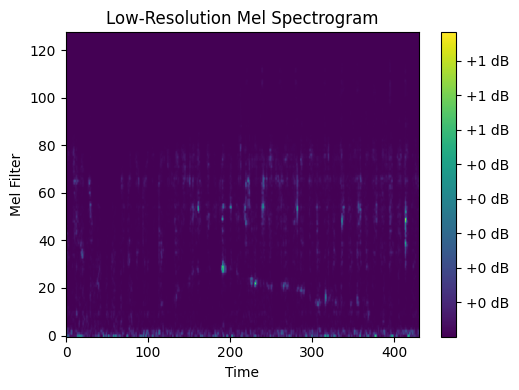

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Low-Resolution Mel Spectrogram')
plt.imshow(mel_spec_low_res, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Mel Filter')
plt.tight_layout()

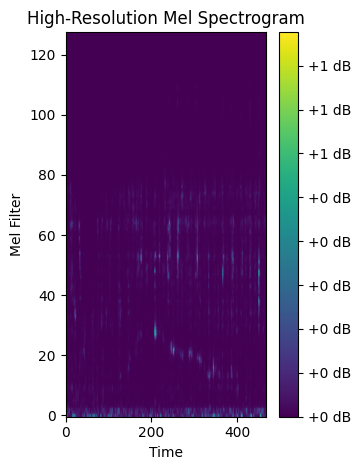

In [11]:
plt.subplot(1, 2, 2)
plt.title('High-Resolution Mel Spectrogram')
plt.imshow(mel_spec_high_res, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Mel Filter')
plt.tight_layout()

In [11]:
low_res_audio.shape

(220500,)

In [12]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [13]:
class WavGAN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(WavGAN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [15]:
def load_audio_file(file_path):
    audio_data, sampling_rate = librosa.load(file_path, sr=None)
    return audio_data, sampling_rate

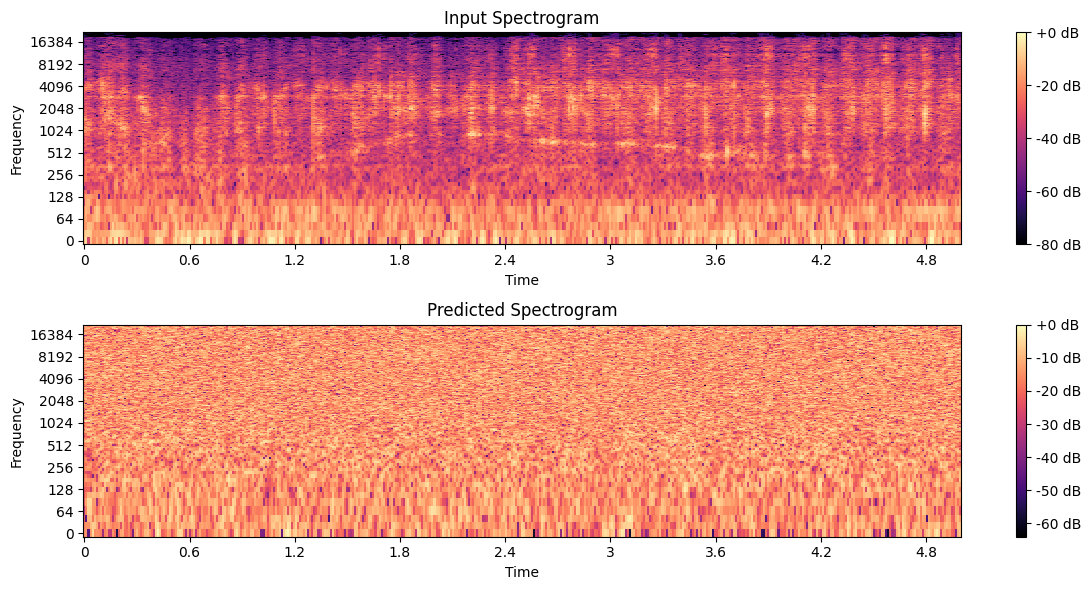

In [31]:
def main():
    audio_file_path = "/content/1-17092-A-27.wav"
    audio_data, sampling_rate = load_audio_file(audio_file_path)

    audio_data /= np.max(np.abs(audio_data))
    spectrogram = np.abs(librosa.stft(audio_data))


    input_dim = len(audio_data)
    output_dim = input_dim

    audio_data_tensor = torch.tensor(audio_data, dtype=torch.float32).unsqueeze(0)

    wav_gan = WavGAN(input_dim=input_dim, output_dim=output_dim)

    with torch.no_grad():
        prediction = wav_gan(audio_data_tensor)

    predicted_audio = prediction.squeeze().numpy()


    predicted_spectrogram = np.abs(librosa.stft(predicted_audio))

    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sampling_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Input Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Frequency')

    plt.subplot(2, 1, 2)
    librosa.display.specshow(librosa.amplitude_to_db(predicted_spectrogram, ref=np.max), sr=sampling_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Predicted Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()



if __name__ == "__main__":
    main()

In [46]:
import numpy as np
from scipy import signal
from mir_eval.separation import bss_eval_sources

In [45]:
!pip install mir_eval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mir_eval: filename=mir_eval-0.7-py3-none-any.whl size=100703 sha256=def9df04cc532b987696a79985297397aad7e196a5a546bff22193c1f90b728d
  Stored in directory: /root/.cache/pip/wheels/3e/2f/0d/dda9c4c77a170e21356b6afa2f7d9bb078338634ba05d94e3f
Successfully built mir_eval


In [47]:
def calculate_snr(original_signal, predicted_signal):
    # Compute SNR
    snr = 10 * np.log10(np.mean(original_signal ** 2) / np.mean((original_signal - predicted_signal) ** 2))
    return snr

In [48]:
def calculate_lsd(original_spectrogram, predicted_spectrogram):
    # Compute Log-Spectral Distance (LSD)
    lsd = np.mean(np.sqrt(np.mean((20 * (np.log10(original_spectrogram + 1e-10) - np.log10(predicted_spectrogram + 1e-10)))**2, axis=0)))
    return lsd


In [50]:
def main():
    audio_file_path = "/content/1-17092-A-27.wav"
    audio_data, sampling_rate = load_audio_file(audio_file_path)
    audio_data /= np.max(np.abs(audio_data))
    spectrogram = np.abs(librosa.stft(audio_data))
    input_dim = len(audio_data)
    output_dim = input_dim
    wav_gan = WavGAN(input_dim=input_dim, output_dim=output_dim)

    audio_data_tensor = torch.tensor(audio_data, dtype=torch.float32).unsqueeze(0)
    with torch.no_grad():
        prediction = wav_gan(audio_data_tensor)
    predicted_audio = prediction.squeeze().numpy()
    predicted_spectrogram = np.abs(librosa.stft(predicted_audio))

    snr = calculate_snr(audio_data, predicted_audio)
    print("SNR:", snr)

    # Calculate LSD
    lsd = calculate_lsd(spectrogram, predicted_spectrogram)
    print("LSD:", lsd)

if __name__ == "__main__":
    main()


SNR: -2.6670271158218384
LSD: 24.760906
